In [5]:
# kaggle titanic set

# **5. Arbitrary  Value Imputation**

1. Consisting of replacing NaN by arbitrary values
2. technique dervied from kaggle comp.

In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
def impute_nan(df, variable):
  df[variable+"_hundred"]=df[variable].fillna(100)
  df[variable+"_zero"]=df[variable].fillna(0)
#take any value which is on the max outlier: left or right

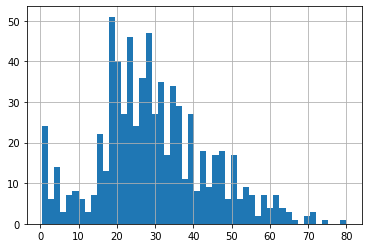

In [8]:
df.Age.hist(bins=50)

**Arbitrary values:** It should not be more frequently present

**Advantages:**
1. easy to implement
2. captures importance of missingness if there is one

**Diadvantages:**
3. distorts the original distribution of the variable
4. hard to decide which value to use
5. if missingness is not important, it may mask the predictive power of the original variable by distorting its distribution

# **# how to handle Categorical missing Values/Features**

https://github.com/krishnaik06/Feature-Engineering-Live-sessions

## **1.Frequent category imputation**

In [15]:
df=pd.read_csv('house.csv')

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
df=pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head() 

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.shape

(1460, 4)

In [19]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [22]:
df.isnull().mean().sort_values(ascending=True)
#since there are less number of missing features in BsmtQUal and Garagetype we can replace them with the most frequent 
#categories


SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [23]:
##compute the frequencies with each feature to get the 'replacing'
df.groupby(['BsmtQual'])['BsmtQual'].count()
# other ways:
#df['BsmtQual'].value_counts()
#df.BsmtQual.value_counts()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

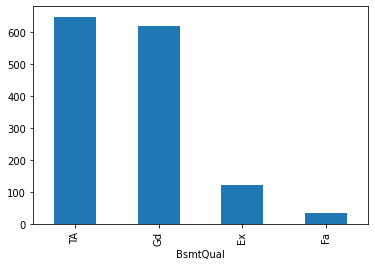

In [29]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

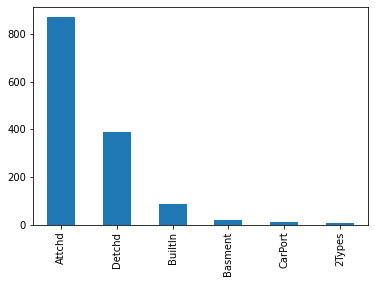

In [30]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

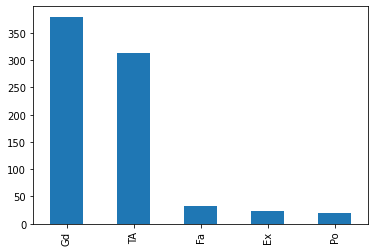

In [31]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [35]:
df['FireplaceQu'].value_counts()[0]

380

In [36]:
df['FireplaceQu'].value_counts().index[0]


'Gd'

In [44]:
## we can use mode also instead of doing it like above
#df['GarageType'].mode()
df['GarageType'].mode()[0]

'Attchd'

In [37]:
## replacing function
def impute_nan(df,variable):
  most_freq_category=df[variable].value_counts().index[0]
# or write
#  most_freq_category=df[variable].mode()[0]

  df[variable].fillna(most_freq_category, inplace=True) 


In [39]:
#either we can write like this or create a loop:
#impute_nan(df, 'GarageType') 
for feature in ['BsmtQual','FireplaceQu' ,'GarageType']:
  impute_nan(df,feature)

In [42]:
#df.head()
#df.isnull().sum()
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Advantages:
1. easy + faster to implement

# Disadvantages:
2. since we are using more frequent labels it may use them in an over represented way if there are many NANs
3. it distorts the relationship between the most frequent labels

# **2. Adding a variable to capture NaN** 

In [58]:
df=pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head() 

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [59]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [60]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [62]:
frequent = df['BsmtQual'].mode()[0]


In [66]:
df['BsmtQual'].fillna(frequent, inplace=True)


In [68]:
df.head()
## capturing the importance and we are also handling missing values with most frequent values

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [69]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


####**Suppose if you have more frequent categories, we replace NaN with a new category**


In [72]:
df=pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head() 

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [75]:
def impute_nan(df, variable):
  df[variable+"_newvar"]=np.where(df[variable].isnull(), "Missing",df[variable])
  #df[variable]=np.where(df[variable].isnull(), "Missing",df[variable])

In [76]:
for feature in ['BsmtQual','FireplaceQu' ,'GarageType']:
  impute_nan(df,feature)

In [77]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [80]:
df=df.drop(['BsmtQual','FireplaceQu' ,'GarageType'],axis=1)

In [81]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Feature Engineering - Handling categorical Features

#1. **One Hot Encoding**

In [85]:
df=pd.read_csv('train.csv',usecols=['Sex'])

In [86]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [90]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [91]:
df=pd.read_csv('train.csv',usecols=['Embarked'])

In [92]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [93]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [94]:
df.dropna(inplace=True)

In [95]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [98]:
 #pd.get_dummies(df, drop_first=False).head()
 pd.get_dummies(df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Disdavantage: creates "curse of dimensionality"

 # **2. One hot encoding with many categories in a feature**

In [102]:
 #https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data?select=train.csv.zip
 df=pd.read_csv('merce.csv', usecols=["X0","X1","X2","X3","X4","X5","X6"])
 df.head()

,X0,X1,X2,X3,X4,X5,X6
0,az,v,n,f,d,t,a
1,t,b,ai,a,d,b,g
2,az,v,as,f,d,a,j
3,az,l,n,f,d,z,l
4,w,s,as,c,d,y,i


In [106]:
 #for i in df.columns:
  # print(df[i].value_counts())
df['X0'].value_counts()

ak    432
y     348
z     335
x     302
ay    299
t     293
o     246
f     213
w     198
j     171
n     167
aj    162
az    161
s     116
ap    108
al     88
h      64
d      61
e      48
v      40
ai     38
m      34
af     34
am     28
i      25
at     21
u      20
ba     19
a      18
b      13
k      12
ad     12
aq     11
aw     11
r      10
ax      8
l       6
c       6
as      6
bc      6
ao      5
au      5
g       3
av      1
p       1
ag      1
ae      1
bb      1
an      1
Name: X0, dtype: int64

In [108]:
len(df['X0'].unique())

49

In [109]:
for i in df.columns:
  print(len(df[i].unique()))

49
27
45
7
4
32
12


In [111]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    826
s     602
l     599
b     596
v     436
r     252
i     189
a     153
c     142
o      81
Name: X1, dtype: int64

In [112]:
#list_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
#list_10

Index(['aa', 's', 'l', 'b', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [113]:
 list_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)

In [114]:
list_10


['aa', 's', 'l', 'b', 'v', 'r', 'i', 'a', 'c', 'o']

In [117]:
for categories in list_10:
  df[categories]=np.where(df['X1']==categories,1,0)

In [122]:
list_10.append('X1')

In [125]:
list_10

['aa', 's', 'l', 'b', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [126]:
 df[list_10]

,aa,s,l,b,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,1,0,0,0,0,0,0,b
2,0,0,0,0,1,0,0,0,0,0,v
3,0,0,1,0,0,0,0,0,0,0,l
4,0,1,0,0,0,0,0,0,0,0,s
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,h
4205,1,0,0,0,0,0,0,0,0,0,aa
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,1,0,0,0,0,0,v
